In [2]:
import sys
import os

# Get the project root (one level up from the current directory)
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add the project root to Python's search path
sys.path.append(project_root)

In [10]:
from src.clustering import *
from src.preprocessing import *
from src.visualization import *
from sklearn.preprocessing import LabelEncoder

In [7]:
file = "../data/processed/processed_data.csv"

df = load_data(file)

df.head()

,CustomerID,gender,Age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
dff = df.drop(columns=['CustomerID'])

le = LabelEncoder()
dff['gender'] = le.fit_transform(dff['gender'])

dff.head()

,gender,Age,annual_income,spending_score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [14]:
features = ['Age', 'annual_income', 'spending_score']

scale_features(df=dff, features=features)

,gender,Age,annual_income,spending_score
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,0,-0.276302,2.268791,1.118061
196,0,0.441365,2.497807,-0.861839
197,1,-0.491602,2.497807,0.923953
198,1,-0.491602,2.917671,-1.250054


In [24]:
kmeans = kmeans_clustering(df=dff, n_clusters=4, features=dff.columns)

kmeans

c:\Users\DELL\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(     gender       Age  annual_income  spending_score  Cluster
 0         1 -1.424569      -1.738999       -0.434801        2
 1         1 -1.281035      -1.738999        1.195704        2
 2         0 -1.352802      -1.700830       -1.715913        2
 3         0 -1.137502      -1.700830        1.040418        2
 4         0 -0.563369      -1.662660       -0.395980        2
 ..      ...       ...            ...             ...      ...
 195       0 -0.276302       2.268791        1.118061        1
 196       0  0.441365       2.497807       -0.861839        3
 197       1 -0.491602       2.497807        0.923953        1
 198       1 -0.491602       2.917671       -1.250054        3
 199       1 -0.635135       2.917671        1.273347        1
 
 [200 rows x 5 columns],
 KMeans(n_clusters=4, random_state=42))

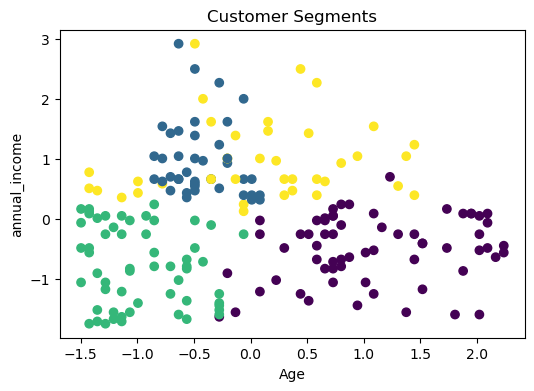

In [32]:
centroid = kmeans[1].cluster_centers_
labels = dff['Cluster']

plt.figure(figsize=(6,4))

plot_clusters(df=dff, x_col='Age', y_col='annual_income', cluster_col='Cluster')

